# Synthetic Seismogram Widget

## Using the Notebook

This is the <a href="https://jupyter.org/">Jupyter Notebook</a>, an interactive coding and computation environment. For this lab, you do not have to write any code, you will only be running it. 

To use the notebook:
- "Shift + Enter" runs the code within the cell (so does the forward arrow button near the top of the document)
- You can alter variables and re-run cells
- If you want to start with a clean slate, restart the Kernel either by going to the top, clicking on Kernel: Restart, or by "esc + 00" (if you do this, you will need to re-run Step 0 before running any other cells in the notebook) 

Instructions as to how to set up Python and the iPython notebook on your personal computer are attached in the appendix of the lab

## Step 0: Import Necessary Packages

In [1]:
# Import the necessary packages
%matplotlib inline                           
from syntheticSeismogramImport import *  

//anaconda/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


## Backgrounds

We begin by constructing a reflectivity series from the physical property model. The physical properties characterizing the model are:
- density ($\rho$) and 
- seismic velocity ($v$)

The acoustic impedance of each layer is:
$$
Z_i = \rho_i v_i
$$

From acoustic impedance, the down-going reflection coefficient for each interface is given by
$$
r_{i,i+1} = \frac{Z_{i+1}-Z_i}{Z_{i+1}+Z_i}
$$

and the transmission coefficient is
$$
t_{i,i+1} = \frac{2Z_{i}}{Z_{i+1}+Z_i}
$$

<img src="./Figures/rt1interface.png" style="width: 40%; height: 40%"></img>
#### Figure 1. Normal incidence for two layer model.

The true reflectivity accounts for both reflection and transmission. For the reflection off of the first layer, these are equivalent. For the reflection off of the second interface, the reflection coefficient $r_{2,3}$ in multiplied by $t_{1,2}t_{2,1}$ to get the true reflectivity. In the below plot, this effect of the transmission coefficients can be included or not using the toggle "usingT."

<img src="./Figures/rt2interface.png" style="width: 40%; height: 40%"></img>
#### Figure 2. Normal incidence for three layer model.

## Setup for constructing a synthetic seismogram

We will consider a model consisting of two horizontal layers over a half-space. Each layer has density $\rho_i$ and seismic velocity $v_i$. In this notebook, we will start from the physical property model and walk through how to construct a synthetic, normal incidence seismogram. 

<img src="./Figures/geoModel.png" style="width: 50%; height: 50%"></img>

## Step 1: From Physical Properties to a Reflectivity Series

- usingT: If you put check mark on this option, this consider transmission coefficients, other wise reflectivity will be same as reflection coefficients

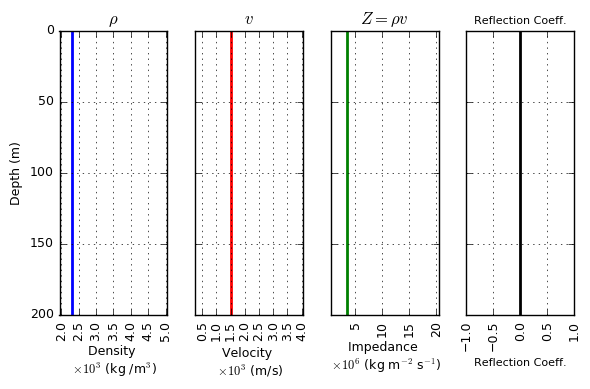

In [2]:
LogVal = InteractLogs(v1=1500,v2=1500,v3=1500)
LogVal

## Step 2: Converting from Depth to Time

Now we have the reflectivity series as a function of depth. With seismic, we measure a signal as a function of time. So we must apply a conversion from depth to time. We do this by computing the time it takes for a signal to reach a given depth and return to the surface. 

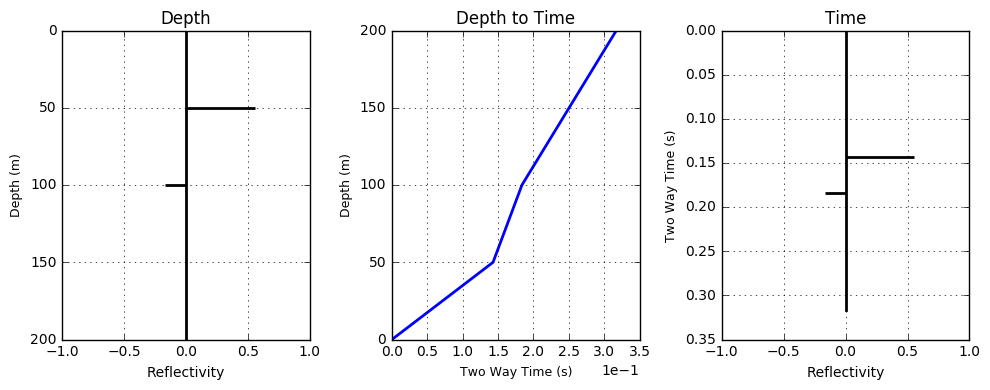

In [3]:
LogVal, DtoT = InteractDtoT(LogVal)
DtoT

## Step 3: Wavelet $\otimes$ Reflectivity = Seismogram

Now that we have the reflectivity series in time, the next step is to choose the input pulse and construct our seismogram. For the following examples, we will use a <a href="http://subsurfwiki.org/wiki/Ricker_wavelet">Ricker Wavelet</a> with peak frequency $f$. 

A seismogram is the convolution of the wavelet and reflectivity series. Here, you can adjust the peak frequency (wavF) of the wavelet and its amplitude (wavA). 

The geologic model used is:
<img src="./Figures/Step3FixedMod.png" style="width: 50%; height: 50%"></img>

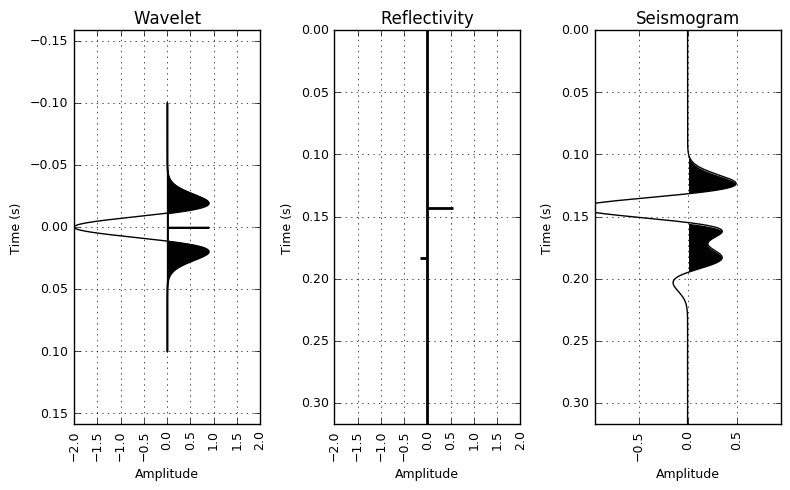

In [6]:
InteractWconvR(LogVal, DtoT)

## Step 4: Seismic Resolution and Forward Modelling

When referring to vertical resolution, the question to ask is: "Can the two arrivals (one from the top, and one from the bottom of the layer) be distinguished?" 

Adjust the layer thickness for the middle layer (by adjusting d2 and/or d3) and the frequency of the input pulse to investigate vertical resolution. You can also add noise to the trace. 

The geologic model is:
<img src="./Figures/geoModel.png" style="width: 50%; height: 50%"></img>

You can adjust all of the parameters. Have fun!

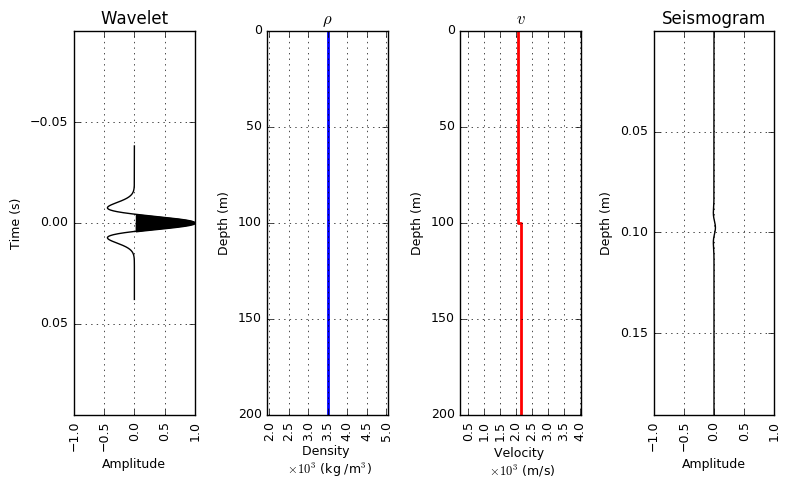

<function syntheticSeismogram.plotSeismogramInteract>

In [5]:
InteractSeismogram()